# Exercise 1

Work on this before the next lecture on 22 March. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2018/issues/1). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.19), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2018/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2018".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [8]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. 

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

## Splitting into training and test sets

The dataset is fairly simple so this is why I decided to use the function called `train_test_split`. I chose to keep 33 % of my dataset as a training set. This proved to not be the most efficient split as explained in the next paragraph.

## Best way to split the data

By looking at the second graph, one can see that the closer we got to 100 % for the training set gives better and better performance. However as the test set is shrinking close to 0 %, there is no reason to use this repartition. The same thing happens when the training set is getting close to 0 % as there is not enough data to get a classifying rule.

The range between 20 and 80 % is our sweet spot. For this dataset I chose to have a training set representing 3/4 of our total dataset.

## Number of neighbours

The training and testing performance are linked to the number of neighbours taken into account for the classifier. Indeed, the lower the number, the more sensitive to noise is our classifier. When the number is high, it is easier to classify as only the biggest number of neighbours is considered. On the third graph, we can see that there is a difference in performance between odd and even number.
To get the most efficient `n_neighbors` for this dataset, we just have to compute the maximum of the score of the testing set and found at which number of neighbours it corresponds.


In [23]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

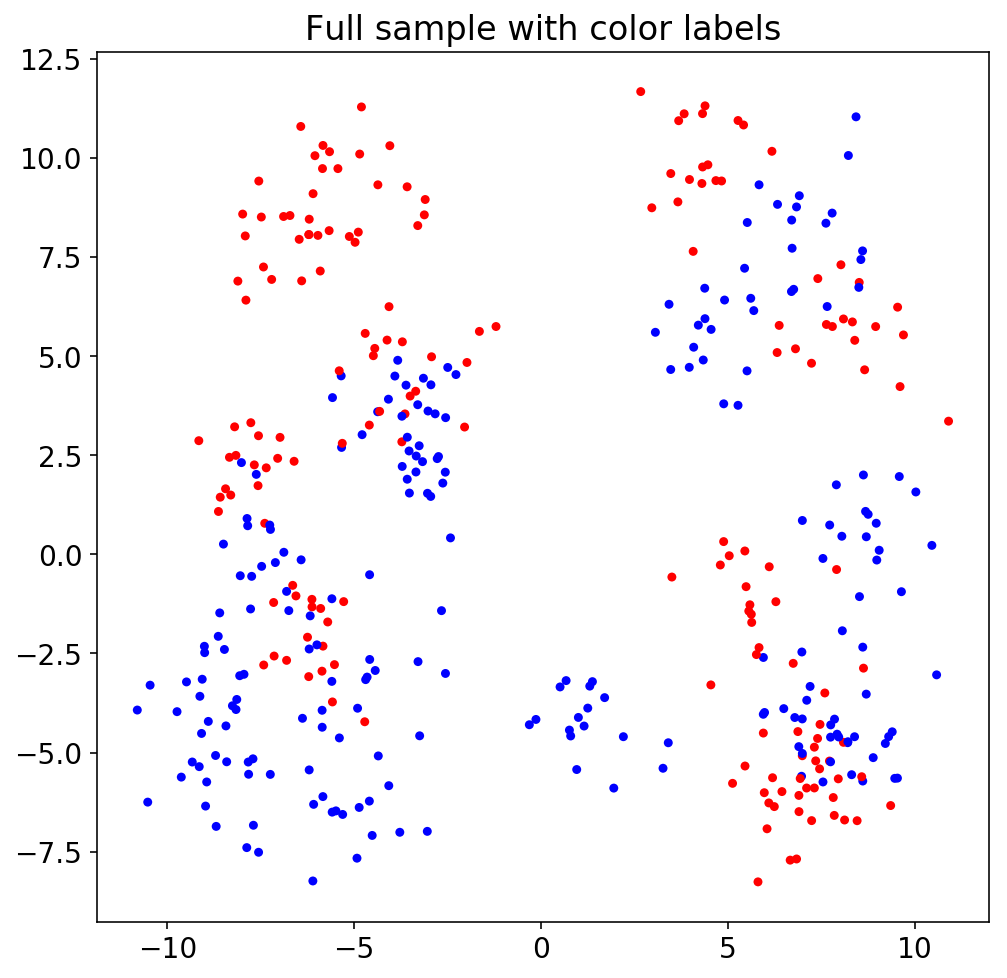

/home/damien/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Score -- training sample : 0.878787878788 

Score -- testing sample: 0.805970149254 
 



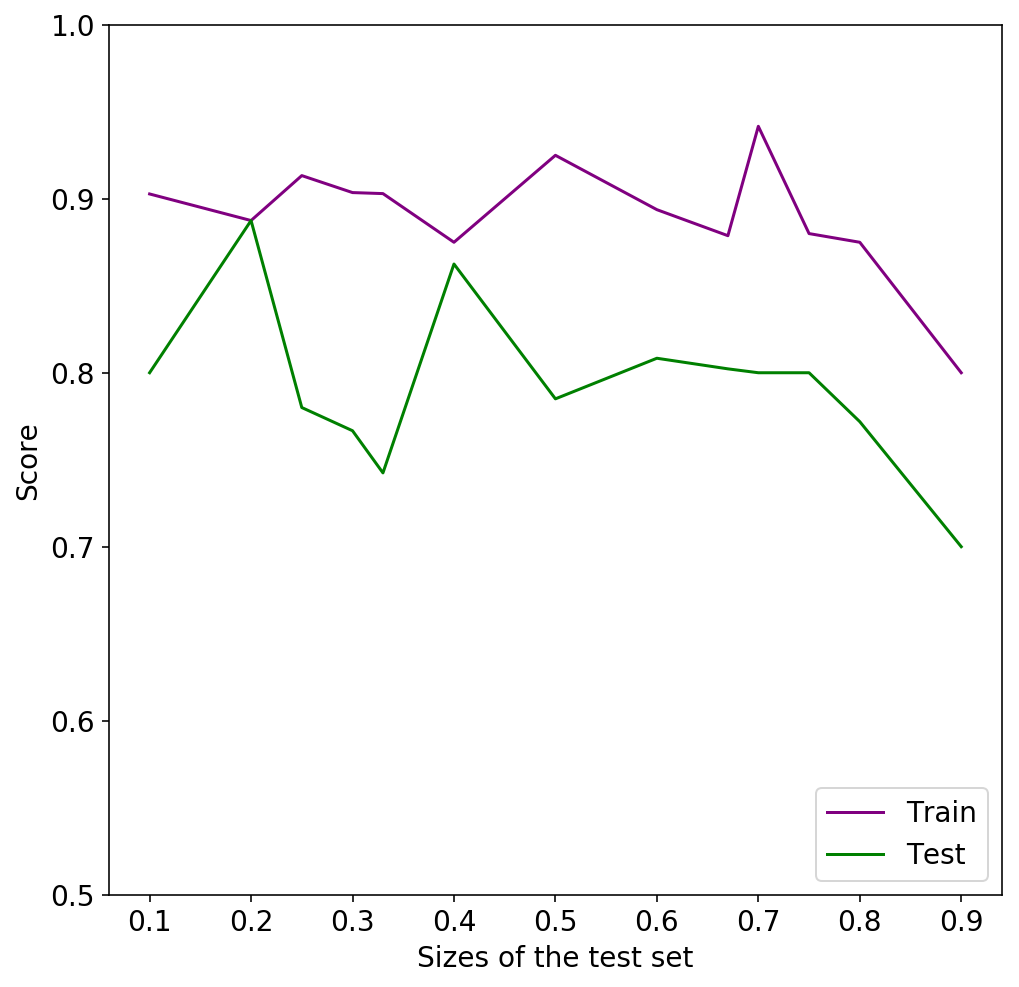

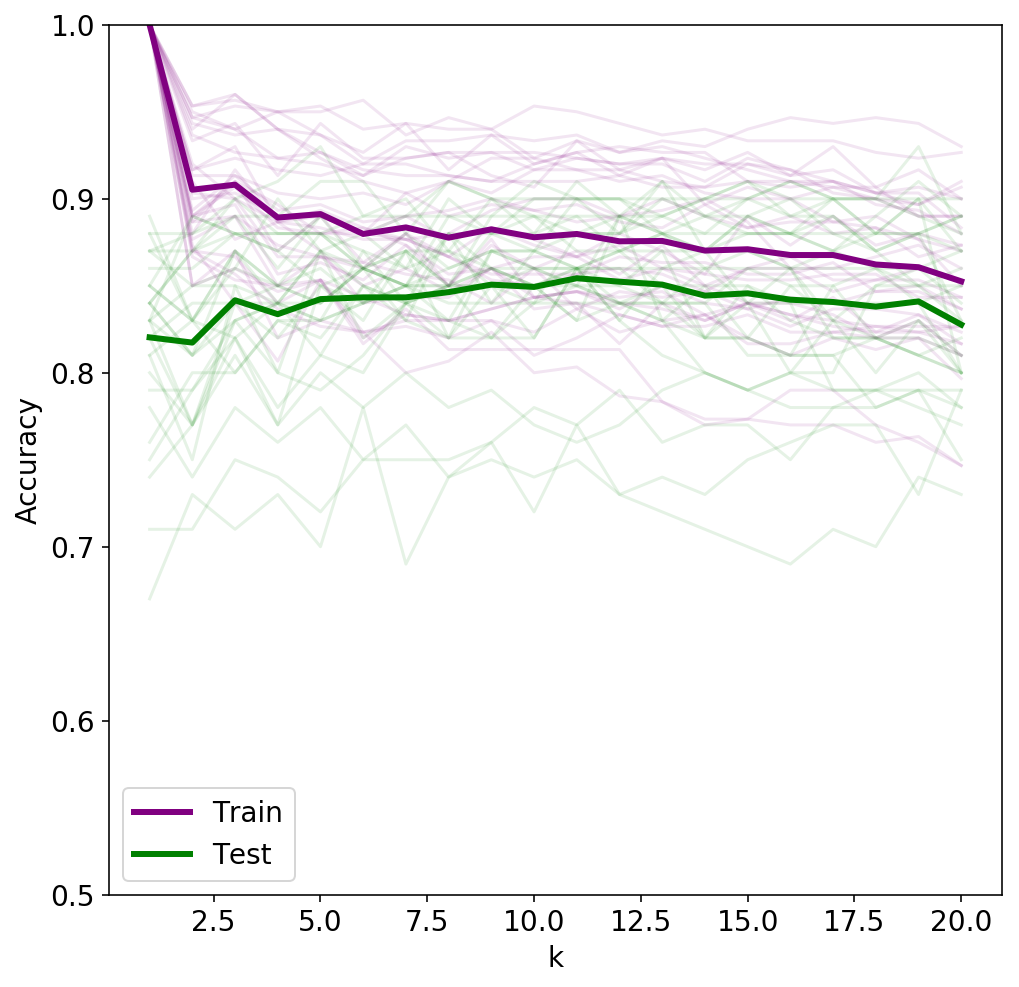

Best setting -- n_neighbours = 11


In [26]:
# Your solution
from sklearn.model_selection import train_test_split

# First point -- plot the dataset
'''
print(len(X),len(y))
plt.figure()
plt.plot(X[0:400,0],X[0:400,1],'.')
plt.title('Full sample without color labels')
plt.show()
'''
red = y =='r'
blue = y == 'b'

plt.figure()
#plt.plot(X[red,0],X[red,1],'.',color='b')
#plt.plot(X[blue,0],X[blue,1],'.',color='r')
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=20)
plt.title('Full sample with color labels')
plt.show()

#Second point -- split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.33, random_state=42)
## Fairly simple dataset so I am using a fairly simple split function

#Third point -- evaluate performance on training set
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print('Score -- training sample :',clf.score(X_train,y_train),'\n')

#Fourth point -- evaluate performance on testing set
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print('Score -- testing sample:',clf.score(X_test,y_test),'\n','\n')

#Fifth point -- repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) 
# and comment on what you see. Is there a "best" way to split your data?
train_scores=[]
test_scores=[]
test_sizes = [.1,.2,.25,.3,.33,.4,.5,.6,.67,.7,.75,.8,.9]
for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train,y_train))
    #clf.fit(X_test,y_test)
    '''print('Scores for a split :',np.int(100*size),'-',np.int(100-100*size))
    print('Training sample :',clf.score(X_train,y_train))
    print('Testing sample:',clf.score(X_test,y_test),'\n')'''
    test_scores.append(clf.score(X_test,y_test))

plt.plot(test_sizes,train_scores,color='purple',label='Train')
plt.plot(test_sizes,test_scores,color='green',label='Test')
plt.legend(loc='lower right')
plt.xlabel('Sizes of the test set')
plt.ylabel('Score')
plt.ylim((0.5, 1.))
plt.title('Influence of the train set size on the performance of the classifier')
plt.show()

## Score of the training set is increasing until it reaches a maximum around 0.75 and then decreases.
## Score of the testing set is pretty much constant.
## There is a best way to split our data, it is when the maximum of performance is reached.

#Sixth point -- Comment on how the 2 estimates agree or disagree
## No idea (yet)

#Seventh point -- plot the accuracy of the classifier as a function of n_neighbors
accuracies_train=[]
accuracies_test=[]
ks=np.arange(1,21,1)

#Need to create new datasets at each iteration
for n in range(30):
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y < 10))
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
    train_scores=[]
    test_scores=[]
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train,y_train)
        train_scores.append(clf.score(X_train,y_train))
        test_scores.append(clf.score(X_test,y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    
    plt.plot(ks,train_scores,color='purple',alpha=.1)
    plt.plot(ks,test_scores,color='g',alpha=.1)

plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', color='purple', lw=3)    
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', color='g', lw=3)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim((0.5, 1.))
plt.title('Influence of the number of neighbours on the performance of the classifier')
plt.show()

#Eight point -- comment on the similarities and differences between the performance on the testing and training dataset
## No idea (yet)

#Ninth point -- a classifier with 4 neighbours is more complicated because it has more parameters than with 10 neighbours

#Tenth point -- find the best setting for n_neighbours for our dataset

max_mean_accuracy=max(np.array(accuracies_test).mean(axis=0))
print('Best setting -- n_neighbours =',np.int(ks[np.where(np.array(accuracies_test).mean(axis=0)==max_mean_accuracy)]))
##best setting is printed below

#Eleventh point -- This is the best setting because the accuracy is maximized and we are not overfitting or underfitting

---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [4]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

## Number of neighbours

At low number of neighbours, solutions are very different due to the higher noise sensitivity of our regressor.
The higher the number of neighbours, the lower the the noise. There is a plateau between 10 - 15 neighbours which corresponds to the dispersion of our data.


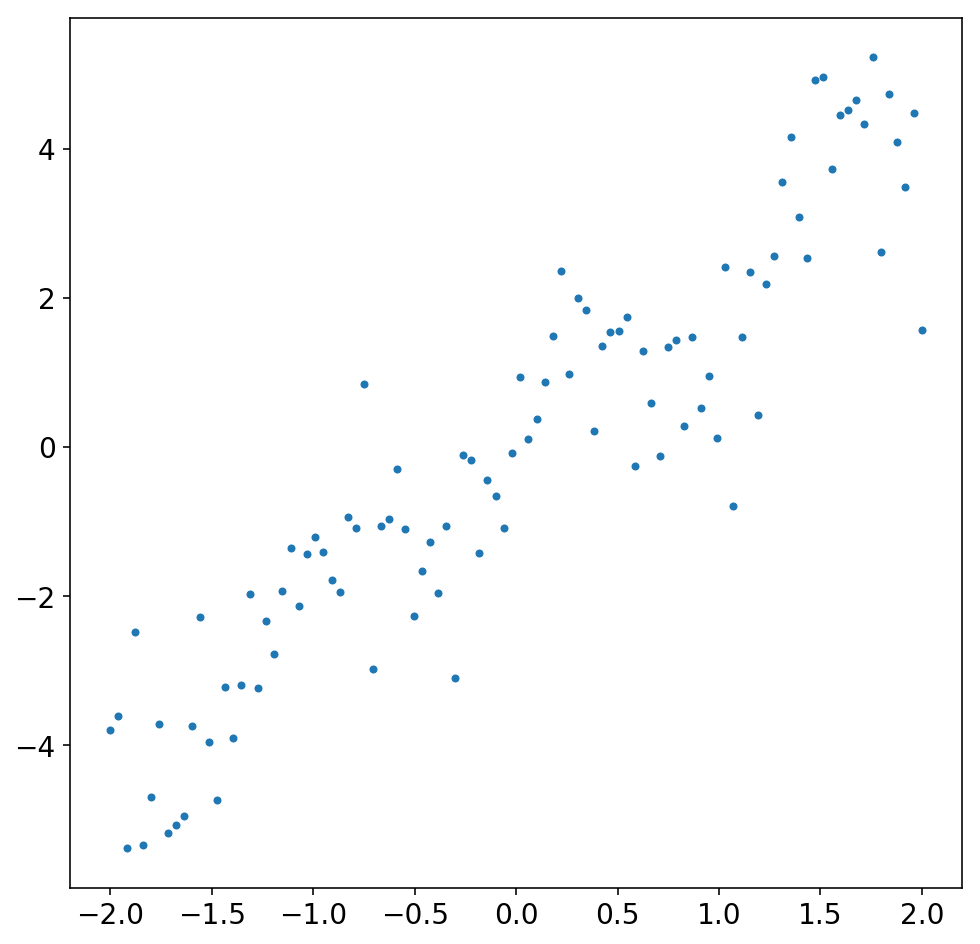

/home/damien/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


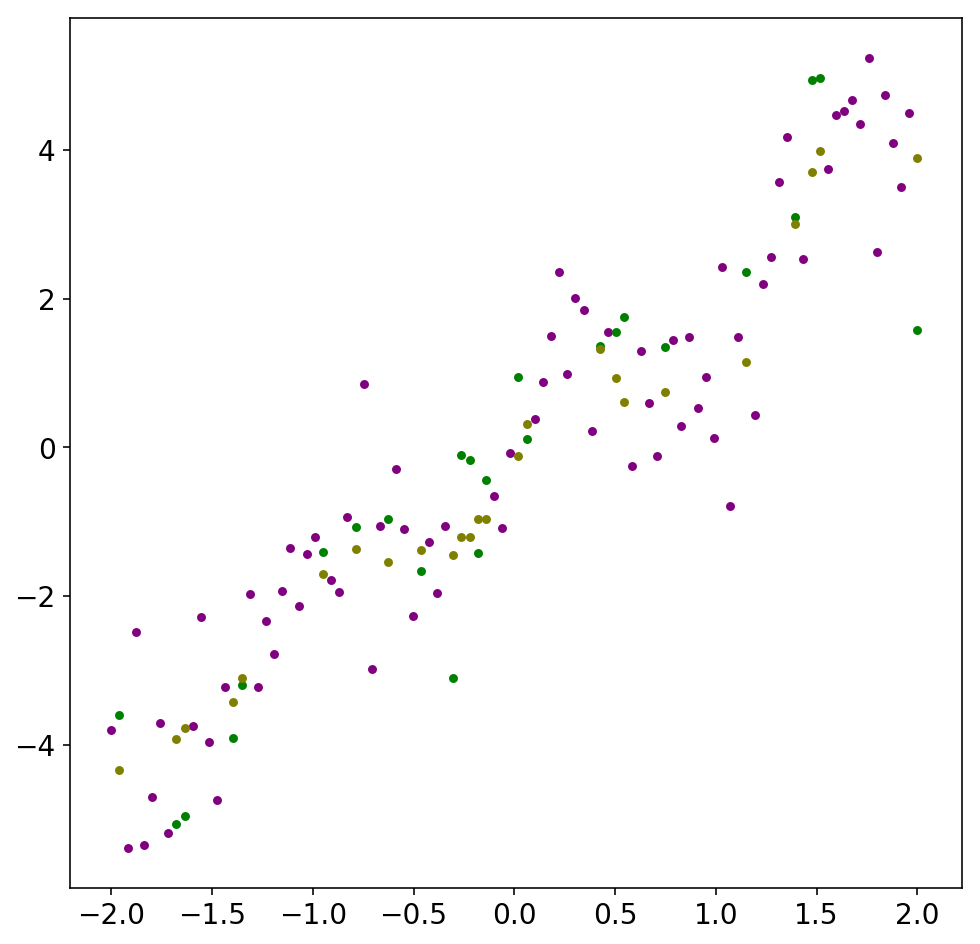

0.618160264593
0.881275876268


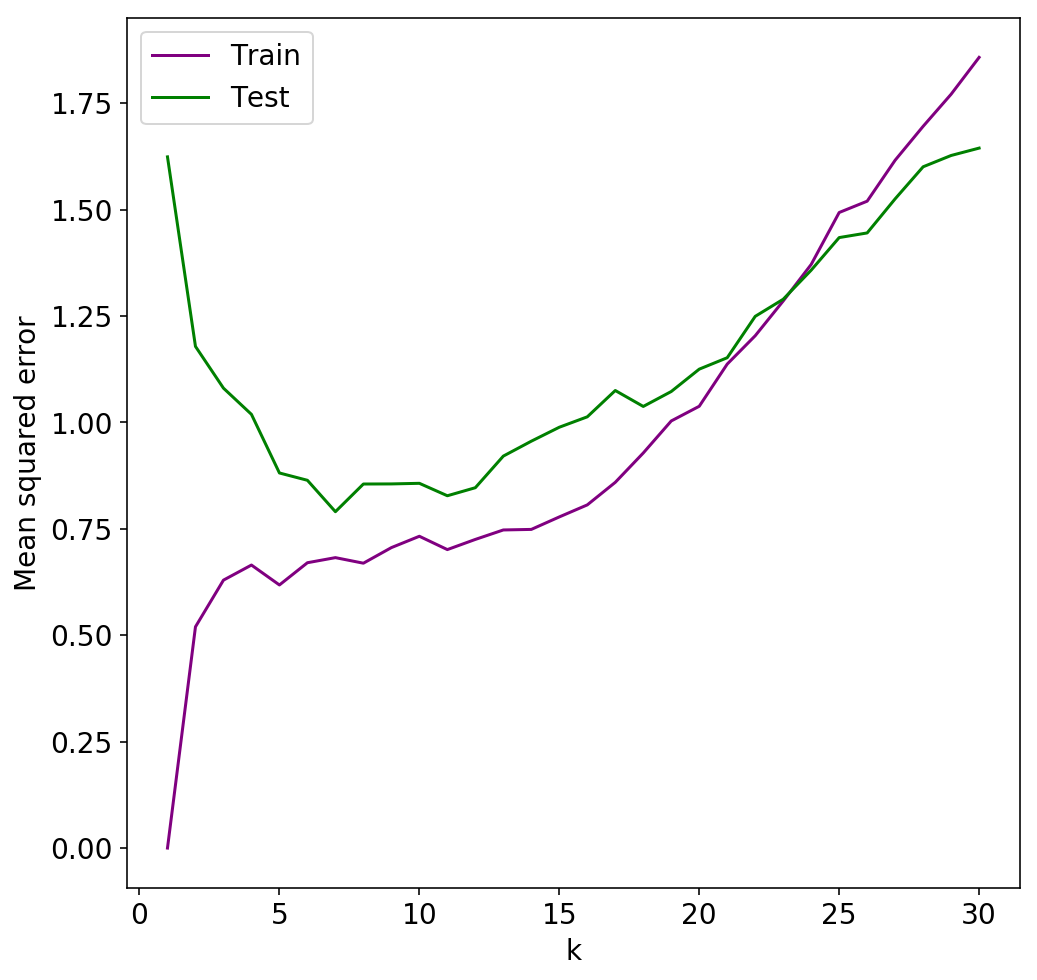

Best setting -- n_neighbours = 7


In [20]:
# Your solution
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#First point -- plot dataset

X,y=make_regression()

#print(X[:,0])
plt.plot(X,y,'.')
plt.show()

#Second point -- fit the regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

clf = KNeighborsRegressor(n_neighbors=5)
clf.fit(X_train,y_train)
plt.scatter(X_train,y_train,c='purple',lw=0,s=20)
plt.scatter(X_test,y_test,c='g',lw=0,s=20)
plt.scatter(X_test,clf.predict(X_test),lw=0,c='olive',s=20)
plt.show()

print(mean_squared_error(y_train,clf.predict(X_train)))
print(mean_squared_error(y_test,clf.predict(X_test)))

#Third point -- mean squared error in function of n_neighbours
mean_squared_error_train=[]
mean_squared_error_test=[]
ks=np.arange(1,31,1)
for k in ks:
    clf = KNeighborsRegressor(n_neighbors=k)
    clf.fit(X_train,y_train)
    mean_squared_error_train.append(mean_squared_error(y_train,clf.predict(X_train)))
    mean_squared_error_test.append(mean_squared_error(y_test,clf.predict(X_test)))
    
plt.plot(ks,mean_squared_error_train,color='purple',label='Train')
plt.plot(ks,mean_squared_error_test,color='green',label='Test')
plt.legend(loc='best')
plt.xlabel('k')
plt.ylabel('Mean squared error')
plt.show()    


#Fifth point -- find the minimum of my main squared error on test sample
print('Best setting -- n_neighbours =',np.int(ks[np.where(np.array(mean_squared_error_test)==np.min(mean_squared_error_test))]))

---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

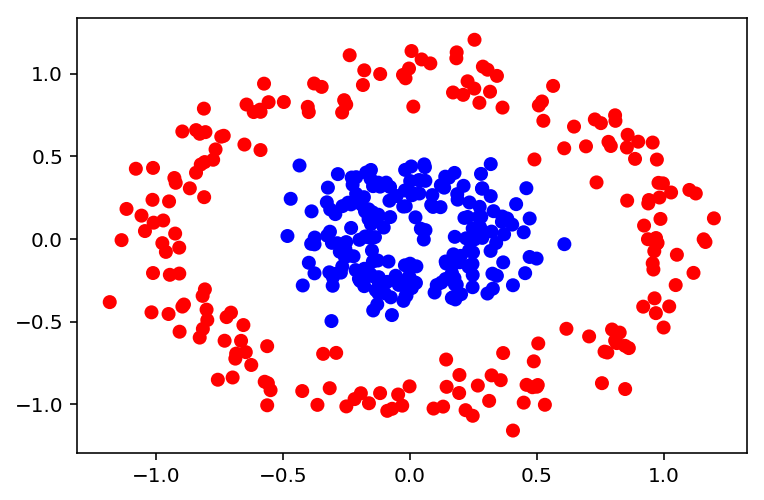

In [6]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

## Complexity

On the first plot, we can see that our classifier does not work at all. The accuracy is pretty low.

In order to increase its accuracy, I decided to change the coordinate system and use the sum of the square of X. This allowed to get a better accuracy for the training set (very close or equal to 1.0) and even for the test set ! (see second plot)

The complexity of this classifier is the power given to X, in my opinion. This is why I look at the accuracy of our classifier as a power of X from 1 to 15. One can clearly see that even power have better accuracy (because all coordinates are positive) and that the accuracy peaks at n = 2.

/home/damien/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


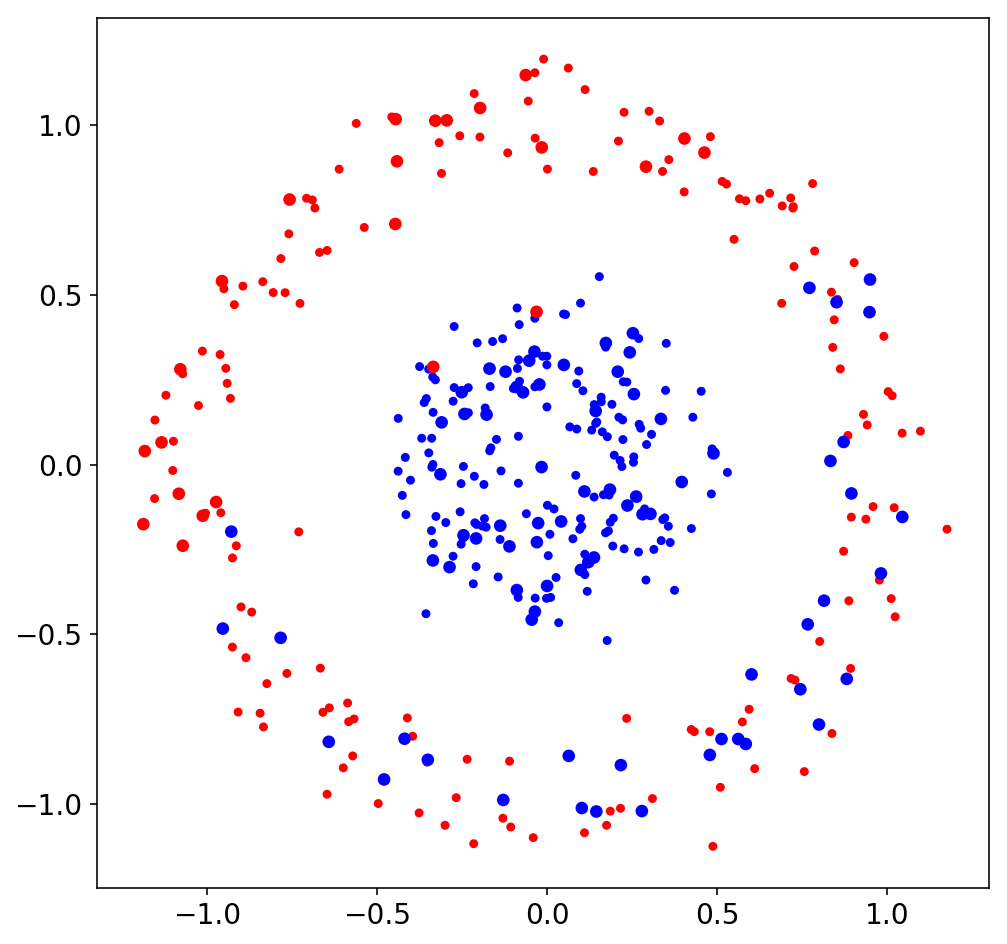

Training score 0.656666666667
Testing score 0.66

 



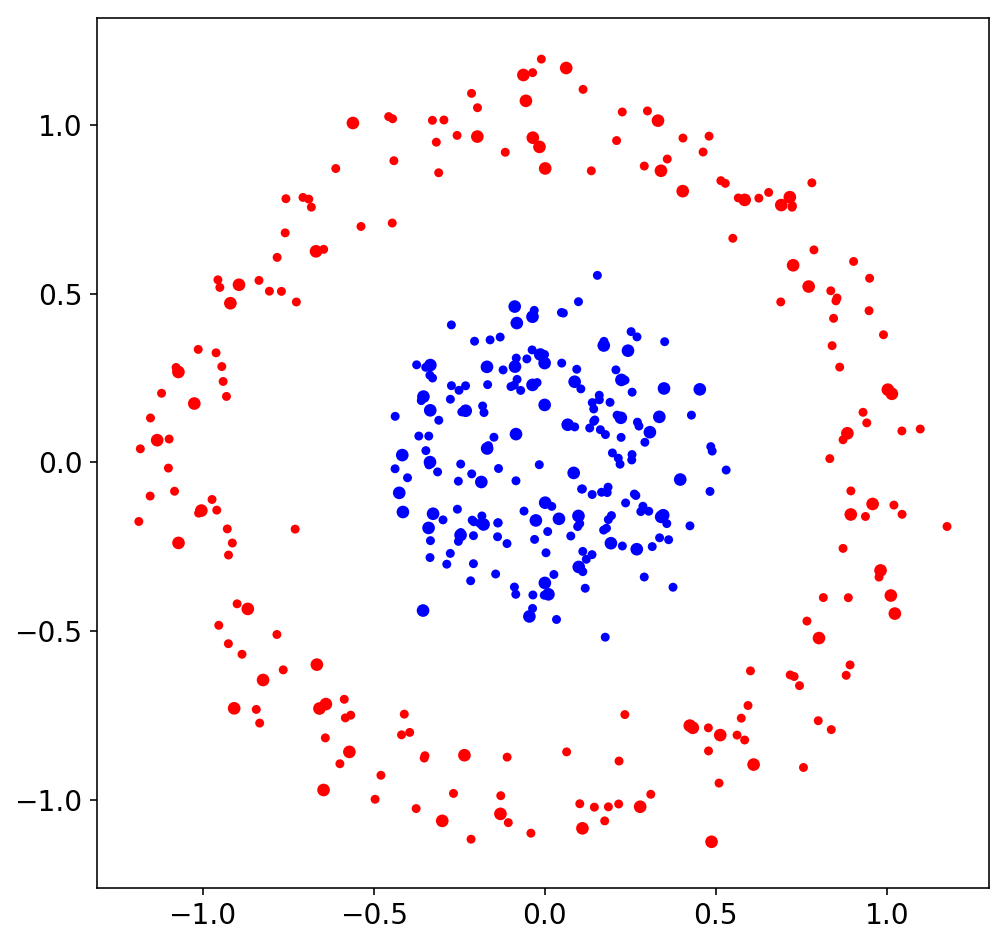

Training score 1.0
Testing score 1.0
[0.51666666666666672, 1.0, 0.73999999999999999, 0.98666666666666669, 0.73333333333333328, 0.94999999999999996, 0.65666666666666662, 0.90000000000000002, 0.48999999999999999, 0.85666666666666669, 0.51666666666666672, 0.83999999999999997, 0.56999999999999995, 0.80000000000000004, 0.57333333333333336]


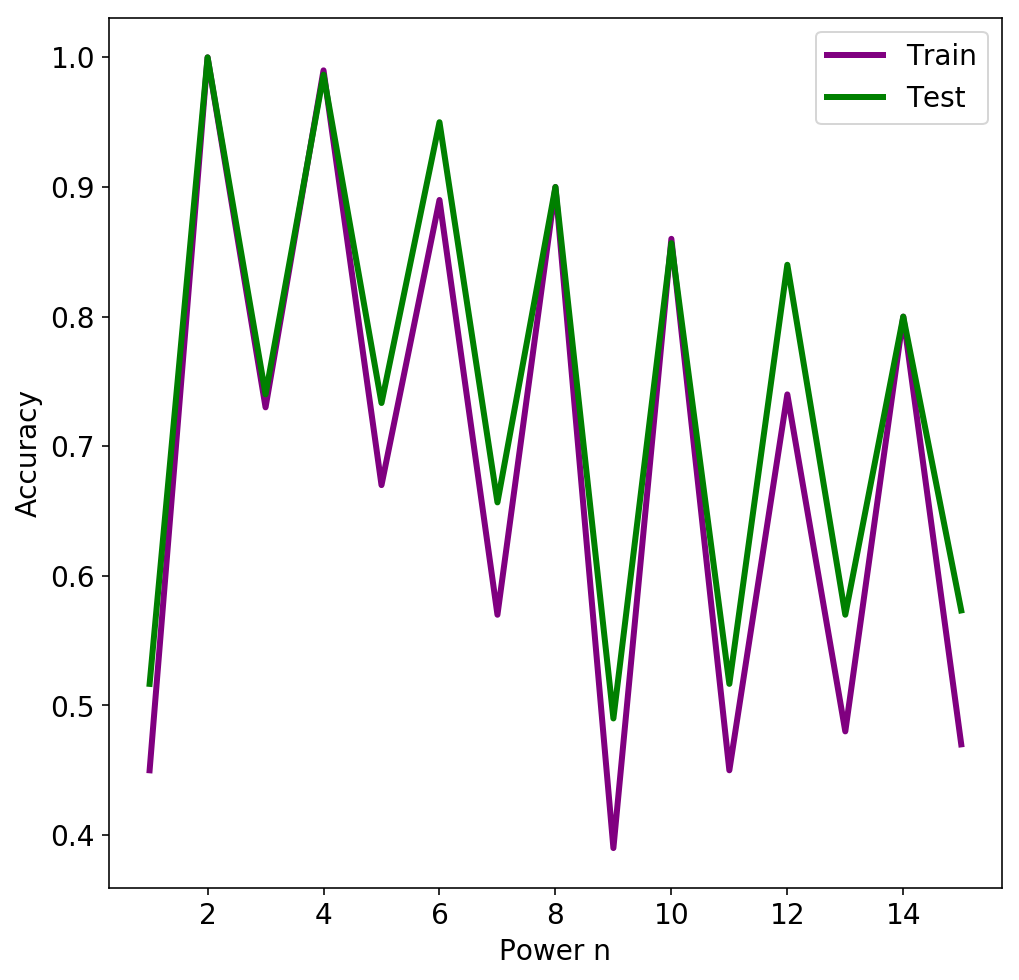

In [31]:
# Your answer

from sklearn.linear_model import LogisticRegression

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

#plt.scatter(X[:,0], X[:,1], c=y)
#plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)


logreg = LogisticRegression()
logreg.fit(X_train,y_train)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,lw=0,s=20)
#plt.scatter(X_test[:,0],X_test[:,0]**2+X_test[:,1]**2,c=y_test,lw=0,s=20)
plt.scatter(X_test[:,0],X_test[:,1],lw=0,c=logreg.predict(X_test),s=40)
#plt.scatter(X_train[:,0],X_train[:,1],lw=0,c=logreg.predict(X_train),s=40)
plt.show()


print('Training score',logreg.score(X_train,y_train))
print('Testing score',logreg.score(X_test,y_test))



#Cs=np.arange(1,1e1,1)

#train_scores=[]
#test_scores=[]
#for c in Cs:
#    logreg = LogisticRegression(C=c)
#    logreg.fit(X_train,y_train)
#    train_scores.append(logreg.score(X_train,y_train))
#    test_scores.append(logreg.score(X_test,y_test))
   
    
#plt.plot(Cs,train_scores,color='purple',alpha=1)
#plt.plot(Cs,test_scores,color='g',alpha=1)
#plt.show()


##Other method
#from sklearn.model_selection import StratifiedKFold
#Ns=np.arange(2,81,1)
#skf = StratifiedKFold(n_splits=2)

#Cs=np.arange(1,1e1,1)

#accuracies_train=[]
#accuracies_test=[]
#for n in Ns:
#    skf=StratifiedKFold(n_splits=n)
#    train_scores=[]
#    test_scores=[]
#    for train_index, test_index in skf.split(X, y):
#        X_train, X_test = X[train_index], X[test_index]
#        y_train, y_test = y[train_index], y[test_index]
#        logreg = LogisticRegression()
#        logreg.fit(X_train,y_train)
#        train_scores.append(logreg.score(X_train,y_train))
#        test_scores.append(logreg.score(X_test,y_test))
        #print(train_scores)
#    accuracies_test.append(np.median(test_scores))
#    accuracies_train.append(np.median(train_scores))
    #print(accuracies_train)

#print(accuracies_test)
        
#print(train_scores)
#print(test_scores)

#plt.plot(Ns, np.array(accuracies_train), label='Train', color='purple', lw=3)    
#plt.plot(Ns, np.array(accuracies_test), label='Test', color='g', lw=3)
#plt.xlabel('n split')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.ylim((0.5, 1.))    
#plt.show()

print('\n','\n')

##Third try -- Use the square sum of X instead of X
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

logreg=LogisticRegression()
new_X_train=np.sum(X_train**2, axis=1)
logreg.fit(new_X_train[:,np.newaxis], y_train)
new_X_test=np.sum(X_test**2, axis=1)
y1=logreg.predict(new_X_test[:,np.newaxis])
y2=logreg.predict(new_X_train[:,np.newaxis])


plt.scatter(X_train[:,0],X_train[:,1],c=y_train,lw=0,s=20)
plt.scatter(X_test[:,0],X_test[:,1],lw=0,c=y1,s=40)
#plt.scatter(X_train[:,0],X_train[:,1],lw=0,c=y2,s=40)
plt.show()

print('Training score',logreg.score(new_X_train[:,np.newaxis],y_train))
print('Testing score',logreg.score(new_X_test[:,np.newaxis],y_test))


##Using the sum of the X to the power of n and see the influence of n on the performance
Ns=np.arange(1,16,1)
accuracies_train=[]
accuracies_test=[]
for n in Ns:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
    logreg=LogisticRegression()
    new_X_train=np.sum(X_train**n, axis=1)
    logreg.fit(new_X_train[:,np.newaxis], y_train)
    new_X_test=np.sum(X_test**n, axis=1)
    #print(train_scores)
    accuracies_test.append(logreg.score(new_X_train[:,np.newaxis],y_train))
    accuracies_train.append(logreg.score(new_X_test[:,np.newaxis],y_test))
    #print(accuracies_train)

print(accuracies_test)


plt.plot(Ns, np.array(accuracies_train), label='Train', color='purple', lw=3)    
plt.plot(Ns, np.array(accuracies_test), label='Test', color='g', lw=3)
plt.xlabel('Power n')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim((0.5, 1.))    
plt.show()

